<a href="https://colab.research.google.com/github/Noma999/World-Happiness-EDA/blob/main/World's_Happiest_Countries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os


In [12]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("unsdsn/world-happiness")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/world-happiness


In [13]:
os.listdir(path)

['2015.csv', '2017.csv', '2019.csv', '2018.csv', '2016.csv']

In [14]:
data_2015 = pd.read_csv("/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2015.csv")
data_2016 = pd.read_csv("/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2016.csv")
data_2017 = pd.read_csv("/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2017.csv")
data_2018 = pd.read_csv("/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2018.csv")
data_2019 = pd.read_csv("/root/.cache/kagglehub/datasets/unsdsn/world-happiness/versions/2/2019.csv")

In [15]:
data_2015.info()
data_2016.info()
data_2017.info()
data_2018.info()
data_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [16]:
data_2015.rename(columns = {
    "Happiness Rank" : "Rank" ,
    "Happiness Score" : "Score" ,
    "Economy (GDP per Capita)" : "GDP" ,
    "Health (Life Expectancy)" : "Health" ,
    "Trust (Government Corruption)" : "Trust" ,
    } , inplace = True)
data_2016.rename(columns = {
    "Happiness Rank" : "Rank" ,
    "Happiness Score" : "Score" ,
    "Economy (GDP per Capita)" : "GDP" ,
    "Health (Life Expectancy)" : "Health" ,
    "Trust (Government Corruption)" : "Trust" ,
} , inplace = True)
data_2017.rename(columns = {
    "Happiness.Rank" : "Rank" ,
    "Happiness.Score" : "Score" ,
    "Economy..GDP.per.Capita." : "GDP" ,
    "Health..Life.Expectancy." : "Health" ,
    "Trust..Government.Corruption." : "Trust" ,
    } , inplace = True)
data_2018.rename(columns = {
    "Overall rank" : "Rank"  ,
    "Country or region" : "Country" ,
    "GDP per capita" : "GDP" ,
    "Social support" : "Family" ,
    "Healthy life expectancy" : "Health"  ,
    "Freedom to make life choices" : "Freedom"  ,
    "Perceptions of corruption" : "Trust"
} , inplace = True )
data_2019.rename(columns = {
    "Overall rank" : "Rank" ,
    "Country or region" : "Country" ,
    "GDP per capita" : "GDP" ,
    "Social support" : "Family" ,
    "Healthy life expectancy" : "Health"  ,
    "Freedom to make life choices" : "Freedom"  ,
    "Perceptions of corruption" : "Trust"
} , inplace = True )

In [17]:
data= pd.concat([data_2015 , data_2016 , data_2017 , data_2018 , data_2019])
data.info()
data

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 155
Data columns (total 17 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    782 non-null    object 
 1   Region                     315 non-null    object 
 2   Rank                       782 non-null    int64  
 3   Score                      782 non-null    float64
 4   Standard Error             158 non-null    float64
 5   GDP                        782 non-null    float64
 6   Family                     782 non-null    float64
 7   Health                     782 non-null    float64
 8   Freedom                    782 non-null    float64
 9   Trust                      781 non-null    float64
 10  Generosity                 782 non-null    float64
 11  Dystopia Residual          315 non-null    float64
 12  Lower Confidence Interval  157 non-null    float64
 13  Upper Confidence Interval  157 non-null    float64
 14 

,Country,Region,Rank,Score,Standard Error,GDP,Family,Health,Freedom,Trust,Generosity,Dystopia Residual,Lower Confidence Interval,Upper Confidence Interval,Whisker.high,Whisker.low,Dystopia.Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738,NaN,NaN,NaN,NaN,NaN
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201,NaN,NaN,NaN,NaN,NaN
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204,NaN,NaN,NaN,NaN,NaN
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531,NaN,NaN,NaN,NaN,NaN
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
151,Rwanda,NaN,152,3.334,NaN,0.35900,0.71100,0.61400,0.55500,0.41100,0.21700,NaN,NaN,NaN,NaN,NaN,NaN
152,Tanzania,NaN,153,3.231,NaN,0.47600,0.88500,0.49900,0.41700,0.14700,0.27600,NaN,NaN,NaN,NaN,NaN,NaN
153,Afghanistan,NaN,154,3.203,NaN,0.35000,0.51700,0.36100,0.00000,0.02500,0.15800,NaN,NaN,NaN,NaN,NaN,NaN
154,Central African Republic,NaN,155,3.083,NaN,0.02600,0.00000,0.10500,0.22500,0.03500,0.23500,NaN,NaN,NaN,NaN,NaN,NaN


In [18]:
data.drop(columns =  [ "Region" , "Standard Error" , "Dystopia.Residual","Region" , "Lower Confidence Interval" , "Upper Confidence Interval" ,
                           "Whisker.high" , "Whisker.low" ] , inplace = True)

In [19]:
data
data.info()
data.describe().T

<class 'pandas.core.frame.DataFrame'>
Index: 782 entries, 0 to 155
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Country            782 non-null    object 
 1   Rank               782 non-null    int64  
 2   Score              782 non-null    float64
 3   GDP                782 non-null    float64
 4   Family             782 non-null    float64
 5   Health             782 non-null    float64
 6   Freedom            782 non-null    float64
 7   Trust              781 non-null    float64
 8   Generosity         782 non-null    float64
 9   Dystopia Residual  315 non-null    float64
dtypes: float64(8), int64(1), object(1)
memory usage: 67.2+ KB


,count,mean,std,min,25%,50%,75%,max
Rank,782.0,78.698210,45.182384,1.00000,40.000000,79.000000,118.000000,158.000000
Score,782.0,5.379018,1.127456,2.69300,4.509750,5.322000,6.189500,7.769000
GDP,782.0,0.916047,0.407340,0.00000,0.606500,0.982205,1.236187,2.096000
Family,782.0,1.078392,0.329548,0.00000,0.869363,1.124735,1.327250,1.644000
Health,782.0,0.612416,0.248309,0.00000,0.440183,0.647310,0.808000,1.141000
Freedom,782.0,0.411091,0.152880,0.00000,0.309768,0.431000,0.531000,0.724000
Trust,781.0,0.125436,0.105816,0.00000,0.054000,0.091000,0.156030,0.551910
Generosity,782.0,0.218576,0.122321,0.00000,0.130000,0.201982,0.278832,0.838075
Dystopia Residual,315.0,2.212032,0.558728,0.32858,1.884135,2.211260,2.563470,3.837720


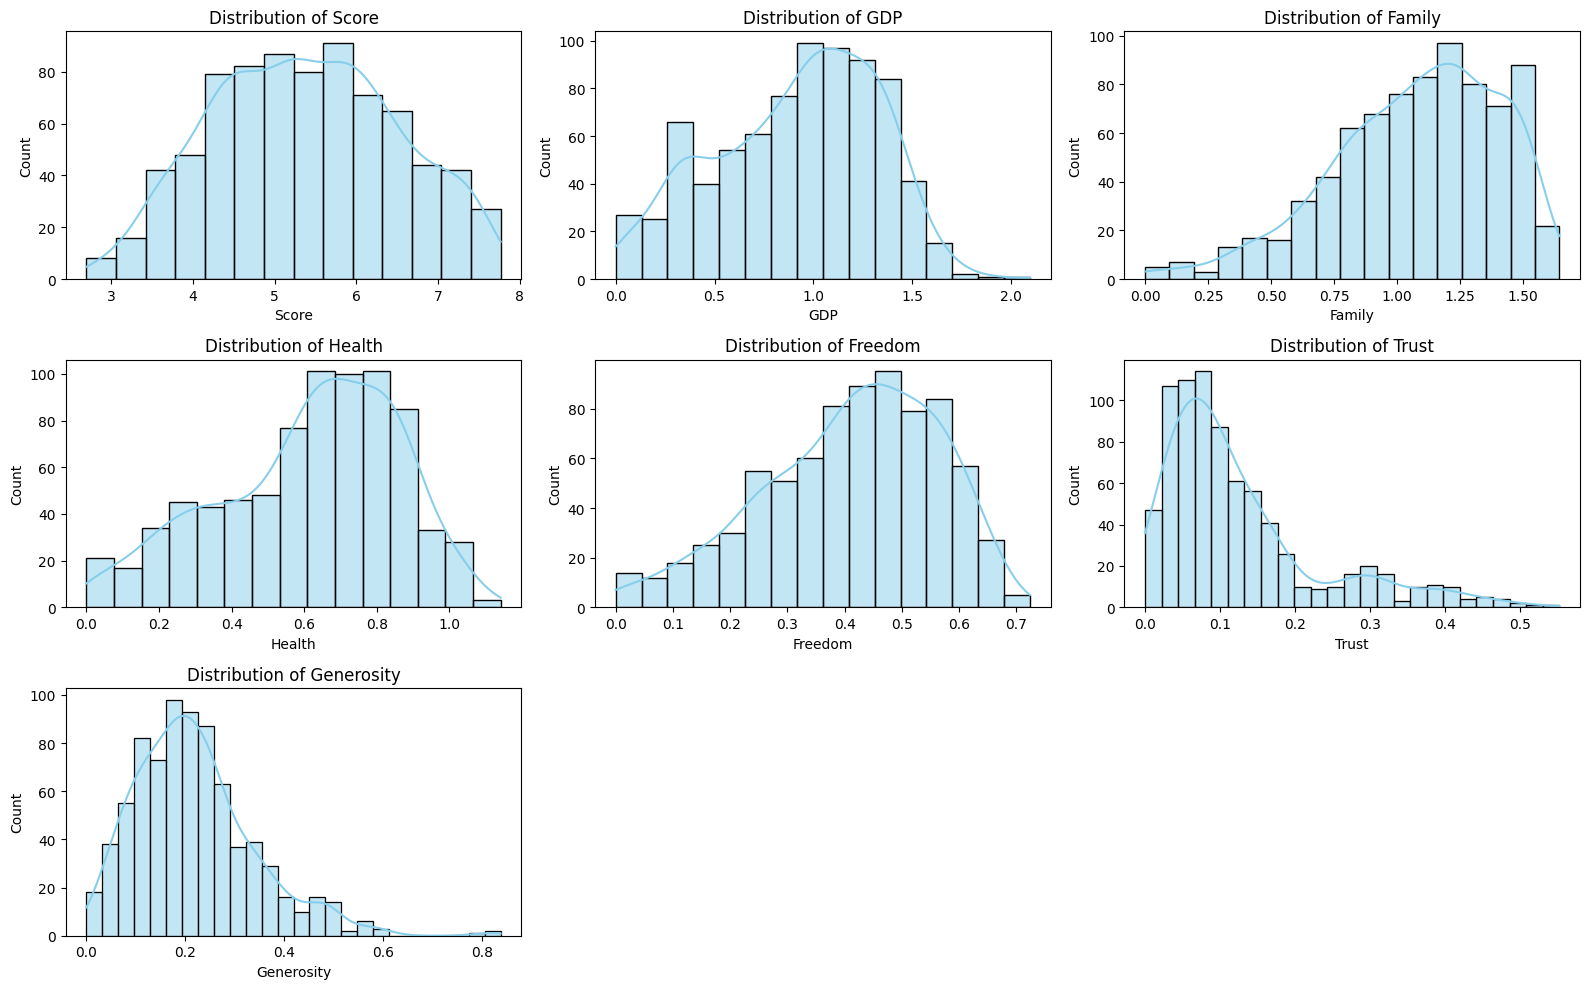

In [20]:
numeric_variable = ["Score" , "GDP" , "Family" , "Health" , "Freedom" , "Trust" , "Generosity"]

plt.figure(figsize=(16, 10))
for i, col in enumerate(numeric_variable, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[col], kde=True, color='skyblue')
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

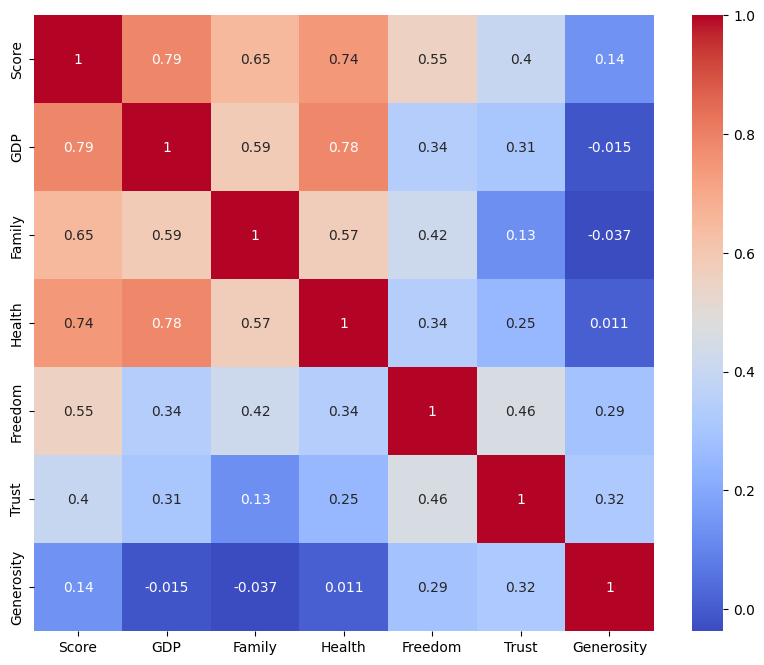

In [21]:
corr=data[numeric_variable].corr()
corr
plt.figure(figsize=(10,8))
sns.heatmap(corr,annot=True,cmap='coolwarm')
plt.show()

In [22]:
data['Country'].value_counts()

,count
Country,
Switzerland,5
Iceland,5
Denmark,5
Norway,5
Canada,5
...,...
Puerto Rico,1
"Hong Kong S.A.R., China",1
Taiwan Province of China,1


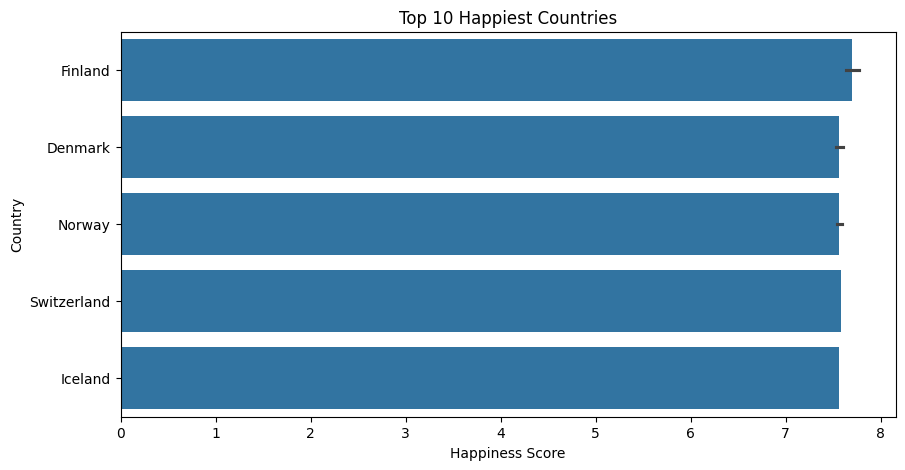

In [28]:
top_10 = data.sort_values(by='Score', ascending=False).head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x='Score', y='Country', data=top_10)
plt.title('Top 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()

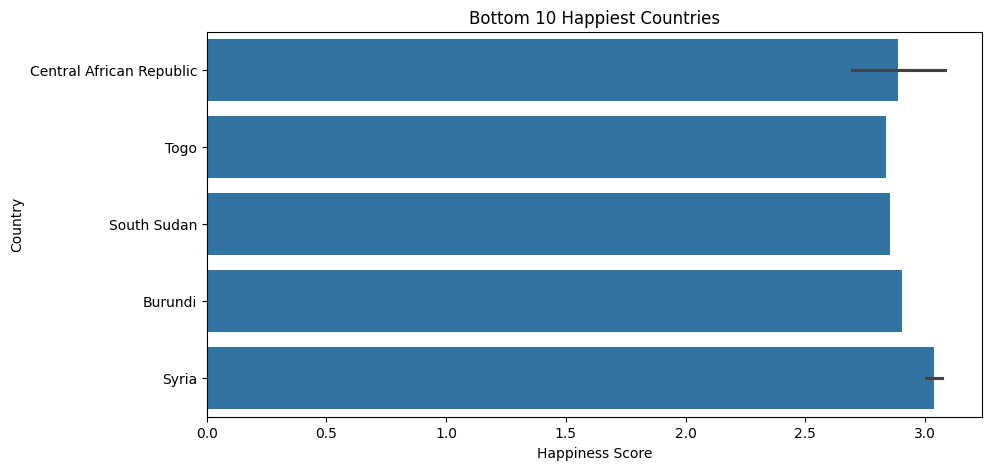

In [29]:
bottom_10 = data.sort_values(by='Score').head(10)
plt.figure(figsize=(10, 5))
sns.barplot(x='Score', y='Country', data=bottom_10)
plt.title('Bottom 10 Happiest Countries')
plt.xlabel('Happiness Score')
plt.ylabel('Country')
plt.show()